<a href="https://colab.research.google.com/github/jsh1021902/CUAI_DeepLearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A0%95%EC%84%9C%ED%98%84_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 신경망

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

- **입력층** (가장 왼쪽 줄, 0층)
- **출력층** (맨 오른쪽 줄, 2층)
- **은닉층** (중간 줄, 1층) : 사람 눈에 보이지 않음

In [42]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


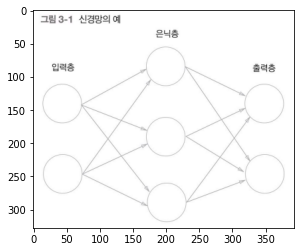

In [43]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/신경망.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

### 3.1.2 퍼셉트론 복습

- **편향** (b) : 뉴런이 얼마나 쉽게 활성화되느냐를 제어함
- **가중치** (w1, w2) : 각 신호의 영향력을 제어함

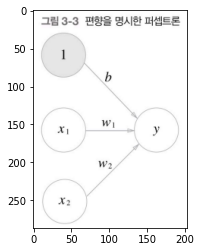

In [44]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/편향명시퍼셉트론.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달됨  
다음 뉴런에서는 이 신호들의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력

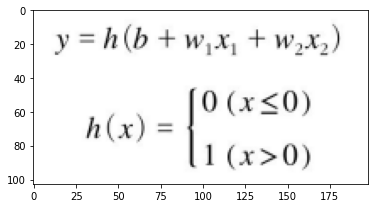

In [45]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/h(x).png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

조건 분기의 동작 (0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)을 하나의 함수로 나타냄  
→ 입력 신호의 총합이 h(x)라는 함수를 거처 변환되어, 그 변환된 값이 y의 출력이 됨을 보여줌  
h(x) 함수는 입력이 0을 넘으면, 1을 돌려주고 그렇지 않으면 0을 돌려줌

### 3.1.3 활성화 함수의 등장

**활성화 함수** : h(x)와 같이 입력 신호의 총합을 출력 신호로 변환하는 함수  
→ 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할


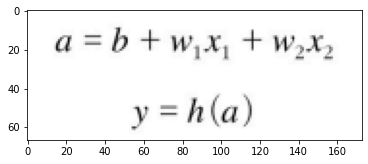

In [46]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/활성화함수.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

1. 가중치가 달린 입력 신호와 편향의 총합을 계산하고 a에 넣기
2. a를 함수 h( )에 넣어 y를 출력

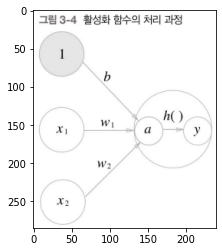

In [47]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/활성화함수처리과정.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

가중치 신호를 조합한 결과 = **a**라는 **노드** → 활성화 함수 h( )를 통과해 **y**라는 **노드**로 변환되는 과정


- **단순 퍼셉트론** : 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델
- **다층 퍼셉트론** : 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)

## 3.2 활성화 함수

- **계단 함수** : 임계값을 경계로 출력이 바뀌는 활성화 함수 같은 함수

### 3.2.1 시그모이드 함수

- **시그모이드 함수** : 신경망에서 자주 이용하는 활성화 함수

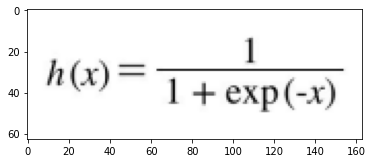

In [48]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/시그모이드함수.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달함

### 3.2.2 계단함수 구현하기

**계단 함수** : 입력값을 경계로 출력이 바뀌는 함수  
→ 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수

In [49]:
import numpy as np
import matplotlib.pylab as plt

In [50]:
def step_function(x):
    if x > 0:               # 인수 x는 실수(부동소수점)만 받아들임
        return 1
    else:
        return 0

In [51]:
# numpy 배열을 위한 구현
def step_function(x):
    y = x > 0
    return y.astype(np.int)
    #return np.array(x > 0, dtype=np.int)       # 넘파이 배열을 인수로 넣을 수 없음

넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열 생성됨 

In [52]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print('넘파이 배열 :', x)

y = x > 0                           # 배열 x의 원소 각각이 0보다 크면 True로, 0 이하면 False로 변환
print('bool 배열 :',y)

넘파이 배열 : [-1.  1.  2.]
bool 배열 : [False  True  True]


In [53]:
y = y.astype(np.int)            # 원하는 계산 함수 = 0이나 1의 int형 출력하는 함수이므로 y의 원소를 bool에서 int로 변환
y

<ipython-input-53-245ca6567fa2>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)            # 원하는 계산 함수 = 0이나 1의 int형 출력하는 함수이므로 y의 원소를 bool에서 int로 변환


array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

**계단함수**는 0을 경계로 출력이 0에서 1 (또는 1에서 0)로 바뀜

<ipython-input-54-b5e1fc021230>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


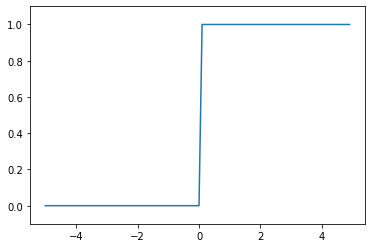

In [54]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)                         # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

시그모이드 함수 구현

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))         # np.exp(-x) = exp(-x) 수식

넘파이의 **브로드캐스트** 기능으로 넘파이 배열도 함수가 훌륭히 처리 가능

In [56]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [57]:
t = np.array([1.0, 2.0, 3.0])
print('1.0 + 배열 t =',1.0 + t)
print('1.0 / 배열 t =',1.0 / t)

1.0 + 배열 t = [2. 3. 4.]
1.0 / 배열 t = [1.         0.5        0.33333333]


시그모이드 함수를 그래프로 그리기

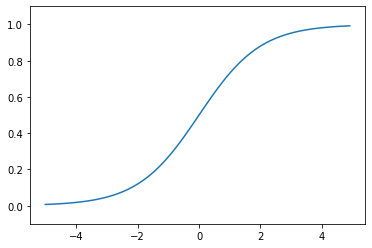

In [58]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)             # y축 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교

시그모이드 함수와 계산 함수의 차이 : **매끄러움**  
→ **시그모이드 함수**는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화함 : 연속적인 실수를 돌려줌  
→ **계단함수**는 0을 경계로 출력이 갑자기 바뀜 : 0과 1 중 하나의 값만 돌려줌

시그모이드 함수와 계산 함수의 공통점  
둘 다 입력이 작을 때의 출력은 0에 가깝고 입력이 커지면 출력이 1에 가까워지는 구조  
→ 입력이 **중요하면 큰 값**을 출력하고 입력이 **중요하지 않으면 작은 값**을 출력

### 3.2.6 비선형 함수

계단 함수와 시그모이드 함수 둘다 **비선형 함수**라는 점에서 공통점이 있음
- 선형 함수 : 변환기에 무언가를 입력했을 때 출력이 입력의 상수배만큼 변하는 함수
- **비선형 함수** : 선형이 아닌 함수 → 직선 1개로는 그릴 수 없는 함수

- 선형함수를 이용하면 신경망의 층을 깊게하는 의미가 없어짐

선형 함수는 은닉층이 없는 네트워크로도 똑같이 표현 가능 → 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없음  
**층을 쌓는 혜택을 얻고 싶다면** 활성화 함수로는 비선형 함수를 사용해야 함

### 3.2.7 ReLU 함수

ReLU (Rectified Linear Unit) : 입력이 0을 넘으면 입력 그대로, 아니면 0을 출력하는 함수

In [59]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/ReLU.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/ReLU수식.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

In [62]:
def relu(x):
    return np.maximum(0, x)         # maximum은 두 입력 중 큰 값을 선택해 반환하는 함수

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

**다차원 배열** : N차원으로 나열하는 것  (기본은 **'숫자의 집합'**)
- A.shape가 튜플을 반환함 ← 1차원 배열이라도 다차원 배열일 때와 통일된 형태로 결과를 반환하기 위함


In [60]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

print('배열 A의 차원 :', np.ndim(A))                    # 1차원 배열

print('배열 A의 형상 :', A.shape)                       # A는 1차원 배열이고 원소 4개로 구성됨

print('배열 A의 튜플의 첫 번째 요소 :', A.shape[0])     # shape 튜플의 첫번째 요소는 4

[1 2 3 4]
배열 A의 차원 : 1
배열 A의 형상 : (4,)
배열 A의 튜플의 첫 번째 요소 : 4


**행렬** : 2차원 배열
- **행** : 가로 방향
- **열** : 세로 방향

In [61]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

print('배열 B의 차원 :', np.ndim(B))

print('배열 B의 형상 :', B.shape)

[[1 2]
 [3 4]
 [5 6]]
배열 B의 차원 : 2
배열 B의 형상 : (3, 2)


### 3.3.2 행렬의 곱

왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산  
→ 계산 결과가 새로운 다차원 배열의 원소가 됨

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/행렬의곱.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- **np.dot( )** : 두 행렬의 곱  
→ 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산함  
※ 행렬의 곱에서는 **피연산자의 순서가 다르면 결과도 다름**

In [64]:
A = np.array([[1,2],[3,4]])
print('배열 A의 형상 :', A.shape)

B = np.array([[5,6],[7,8]])
print('배열 B의 형상 :', B.shape)

print('두 행렬의 곱 :\n', np.dot(A,B))

배열 A의 형상 : (2, 2)
배열 B의 형상 : (2, 2)
두 행렬의 곱 :
 [[19 22]
 [43 50]]


※ **행렬의 형상** 주의  
행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야 함

In [63]:
A = np.array([[1,2,3],[4,5,6]])
print('배열 A의 형상 :', A.shape)

B = np.array([[1,2],[3,4],[5,6]])
print('배열 B의 형상 :', B.shape)

print('두 행렬의 곱 :\n', np.dot(A,B))

배열 A의 형상 : (2, 3)
배열 B의 형상 : (3, 2)
두 행렬의 곱 :
 [[22 28]
 [49 64]]


행렬 A의 1번째 차원과 행렬 C의 0번째 차원의 원소 수가 다르면 오류 발생

In [65]:
C = np.array([[1,2],[3,4]])
print('배열 C의 형상 :', C.shape)

print('배열 A의 형상 :', A.shape)

print('두 행렬의 곱 :\n', np.dot(A,C))

배열 C의 형상 : (2, 2)
배열 A의 형상 : (2, 2)
두 행렬의 곱 :
 [[ 7 10]
 [15 22]]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/행렬곱차원일치1.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/행렬곱차원일치2.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

In [66]:
A = np.array([[1,2],[3,4],[5,6]])
print('배열 A의 형상 :', A.shape)

B = np.array([7,8])
print('배열 B의 형상 :', B.shape)

print('두 행렬의 곱 :\n', np.dot(A,B))

배열 A의 형상 : (3, 2)
배열 B의 형상 : (2,)
두 행렬의 곱 :
 [23 53 83]


### 3.3.3 신경망에서의 행렬 곱

신경망은 편향과 활성화 함수를 생략하고 가중치만 갖음  
np.dot 함수 사용하지 않는다면, for문을 사용해 Y의 원소를 하나씩 계산해야함

In [68]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/신경망행렬곱.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

FileNotFoundError: ignored

In [67]:
X = np.array([1, 2])
print('배열 X :\n', X)
print('배열 X의 형상 :', X.shape)


W = np.array([[1,3,5],[2,4,6]])
print('배열 W :\n', W)
print('배열 W의 형상 :', W.shape)

Y = np.dot(X, W)
print('배열 Y :\n', Y)

배열 X :
 [1 2]
배열 X의 형상 : (2,)
배열 W :
 [[1 3 5]
 [2 4 6]]
배열 W의 형상 : (2, 3)
배열 Y :
 [ 5 11 17]


## 3.4 3층 신경망 구현하기

### 3.4.1 표기법 설명

입력층(0층) 2개, 첫 번째 은닉층(1층) 3개, 두 번째 은닉층(2층) 2개, 출력층(3층) 2개의 뉴런으로 구성.  
- 1, 2층의 활성화 함수 : 시그모이드  
- 3층의 활성화 함수 : 항등함수

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.  
예를 들어 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수,
다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적

### 3.4.2 각 층의 신호 전달 구현하기

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)                                     # (2, 3)
print(X.shape)                                      # (2, )
print(B1.shape)                                     # (3, )

A1 = np.dot(X, W1) + B1

In [ ]:
Z1 = sigmoid(A1)

print(A1)           # [0.3, 0.7, 1.1]
print(Z1)           # [0.57444252, 0.66818777, 0.75026011]

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)                                         # (3,)
print(W2.shape)                                         # (3, 2)
print(B2.shape)                                         # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [ ]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)                   # 혹은 Y = A3

### 3.4.3 구현 정리

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  
print(y)                                                                # [ 0.31682708  0.69627909]

## 3.5 출력층 설계하기

기계학습 문제는 분류classification와 회귀regression로 나뉜다.
- 분류 : 데이터가 어느 클래스에 속하는가 하는 문제. ex.사진속 인물의 성별
- 회귀 : 입력 데이터에서 (연속적인) 수치를 예측하는 문제. ex. 사진속 인물의 몸무게


### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

소프트맥스 함수 softmax function  
yk = exp(ak) / sigma(i=1 to n)(exp(ai))

In [ ]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)               # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a)       # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

소프트맥스 함수는 지수함수를 사용하기 때문에 아주 큰 값을 사용하게 되고, 오버플로로 인해 결과 수치가 불안정해질 수 있다.  
분자분모에 특정 수치(일반적으로 최대값)을 곱해줘서 결과를 보정한다.

In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))        # 소프트맥스 함수의 계산 → 제대로 계산되지 않는다

c = np.max(a)                        # c = 1010 (최댓값)
a - c

np.exp(a - c) / np.sum(np.exp(a - c))

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

소프트맥스 함수의 출력은 0에서 1사이의 실수이며 출력의 총합은 1이다.
따라서 출력을 확률로 해석할 수 있다.  
단, 원소의 대소 관계는 변하지 않기 때문에 자원 낭비를 줄이기 위해 생략하기도 한다.

기계 학습의 문제 풀이는 학습과 추론의 두 단계로 이루어진다.  
추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이며,
학습시킬때는 출력층에서 소프트맥스 함수를 사용한다.


In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

np.sum(y)

### 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.  
분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.  
예를 들어 이미지를 0~9로 분류하는 문제에서는 출력층을 10개로 설정한다.

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

0 ~ 9 숫자 이미지로 구성.  
훈련 이미지 60000장, 시험 이미지 10000장  
28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐  
레이블은 정답에 해당하는 숫자

In [ ]:
import sys, os
import pickle
import numpy as np
sys.path.append(os.pardir)                              # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

# 처음 한 번은 몇 분 정도 걸림
# 이미지를 numpy 배열로 저장
# flatten : 입력 이미지를 평탄화(1차원 배열로)
# normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

img = x_train[0]
label = t_train[0]
print(label)                                                            # 5

print(img.shape)                                                        # (784,)
img = img.reshape(28, 28)                                               # 원래 이미지의 모양으로 변형
print(img.shape)                                                        # (28, 28)

img_show(img)

### 3.6.2 신경망의 추론 처리

- 입력층 784개, 출력층 10개,
- 은닉층 50개, 100개로 구성(임의)

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

### 3.6.3 배치 처리

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

x[0].shape

W1.shape
W2.shape
W3.shape

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100            # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) 

In [ ]:
list(range(0, 10))

list(range(0, 10, 3))

In [ ]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])

y = np.argmax(x, axis=1)
print(y)

In [ ]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)